Import libraries and collect the data

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2023-12-30'
end = '2024-12-30'

# Tickers of assets
assets = pd.read_csv('assets_sample34 - final.csv').iloc[:,0].tolist()
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%***********************]  35 of 35 completed


Calcuate the returns

In [4]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,AFE.JO,AIP.JO,ANH.JO,ARI.JO,AVI.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,...,PMR.JO,PRX.JO,REM.JO,RNI.JO,SBK.JO,SHP.JO,SOL.JO,SUI.JO,TLT,TRU.JO
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-03 00:00:00+00:00,-0.4488%,-0.0996%,0.6257%,-3.1990%,-1.3455%,-1.5511%,-2.0823%,1.9305%,-1.8761%,-2.3786%,...,-0.0159%,2.1369%,-1.9755%,-2.2595%,-1.9999%,-1.4599%,-0.3884%,1.6566%,0.4170%,-1.5021%
2024-01-04 00:00:00+00:00,1.2115%,-1.2292%,0.4198%,0.9610%,-0.1720%,-0.2572%,-0.5160%,1.2837%,-2.4245%,0.6852%,...,0.0000%,1.4134%,0.4765%,0.2769%,0.3697%,-1.4815%,1.0434%,-0.0741%,-1.5194%,-3.0223%
2024-01-05 00:00:00+00:00,0.6124%,0.0000%,-0.3441%,0.4706%,-0.5415%,-0.8640%,0.7696%,0.5846%,0.0459%,-0.1949%,...,-2.3344%,-0.7723%,0.2884%,-0.8349%,0.8349%,2.0338%,0.6956%,-0.1730%,-0.9566%,1.2009%
2024-01-08 00:00:00+00:00,-0.1660%,0.0673%,1.2994%,-2.0790%,0.5569%,-1.4471%,-0.4022%,0.0622%,0.8459%,0.3170%,...,0.8130%,-0.9089%,0.3323%,-0.5547%,0.4432%,1.8091%,-3.1358%,-3.2673%,0.9866%,0.6922%
2024-01-09 00:00:00+00:00,0.1848%,1.6807%,-0.2997%,-0.3332%,-0.0861%,-1.0130%,0.4111%,-0.0888%,0.5785%,-0.9520%,...,0.0000%,-1.6287%,-0.6878%,-0.6667%,0.5867%,-1.4367%,1.1033%,2.3541%,-0.6376%,1.9360%


Calculating the vanilla risk parity portfolio

In [5]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model = 'Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)

,AFE.JO,AIP.JO,ANH.JO,ARI.JO,AVI.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,...,PMR.JO,PRX.JO,REM.JO,RNI.JO,SBK.JO,SHP.JO,SOL.JO,SUI.JO,TLT,TRU.JO
weights,2.0350%,2.3638%,4.3934%,1.4601%,2.6537%,2.5287%,4.3497%,7.4791%,1.7323%,3.2262%,...,2.3421%,2.3477%,1.7201%,3.1036%,1.8249%,1.8902%,1.2438%,2.5464%,7.9719%,1.4348%


Portfolio composition

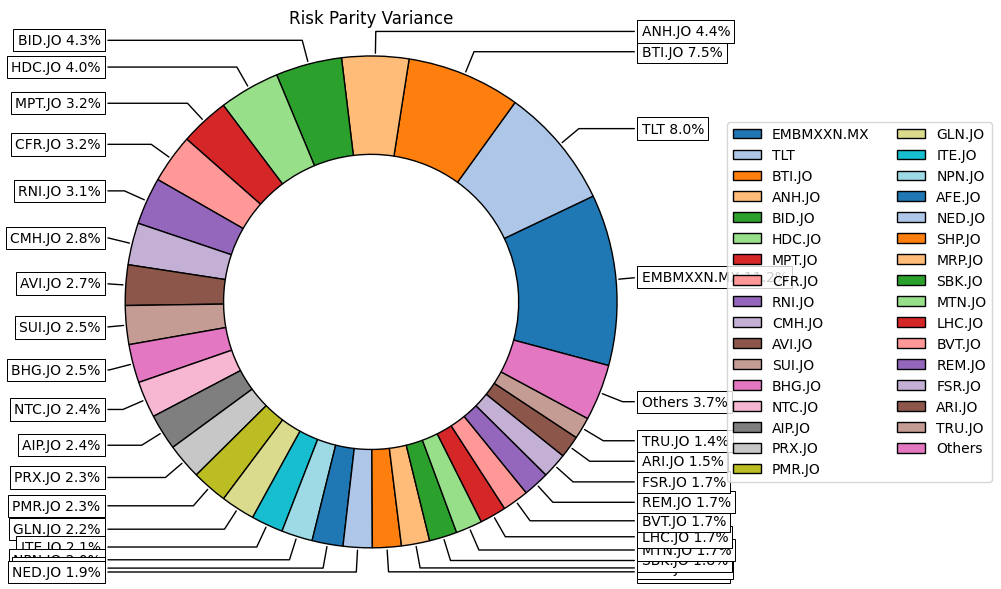

In [6]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

Risk Composition

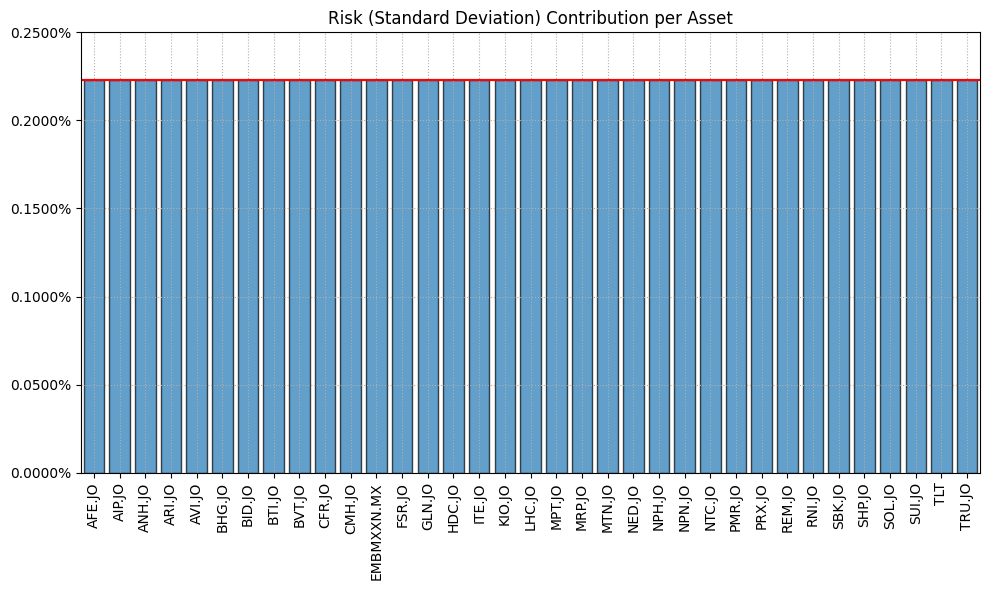

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05,
                      color="tab:blue", height=6, width=10, ax=ax)

# Plotting equal risk contribution line
a1 = rp.Sharpe_Risk(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.05)
ax.axhline(y=a1/len(assets) * 252**0.5, color='r', linestyle='-')

plt.show()

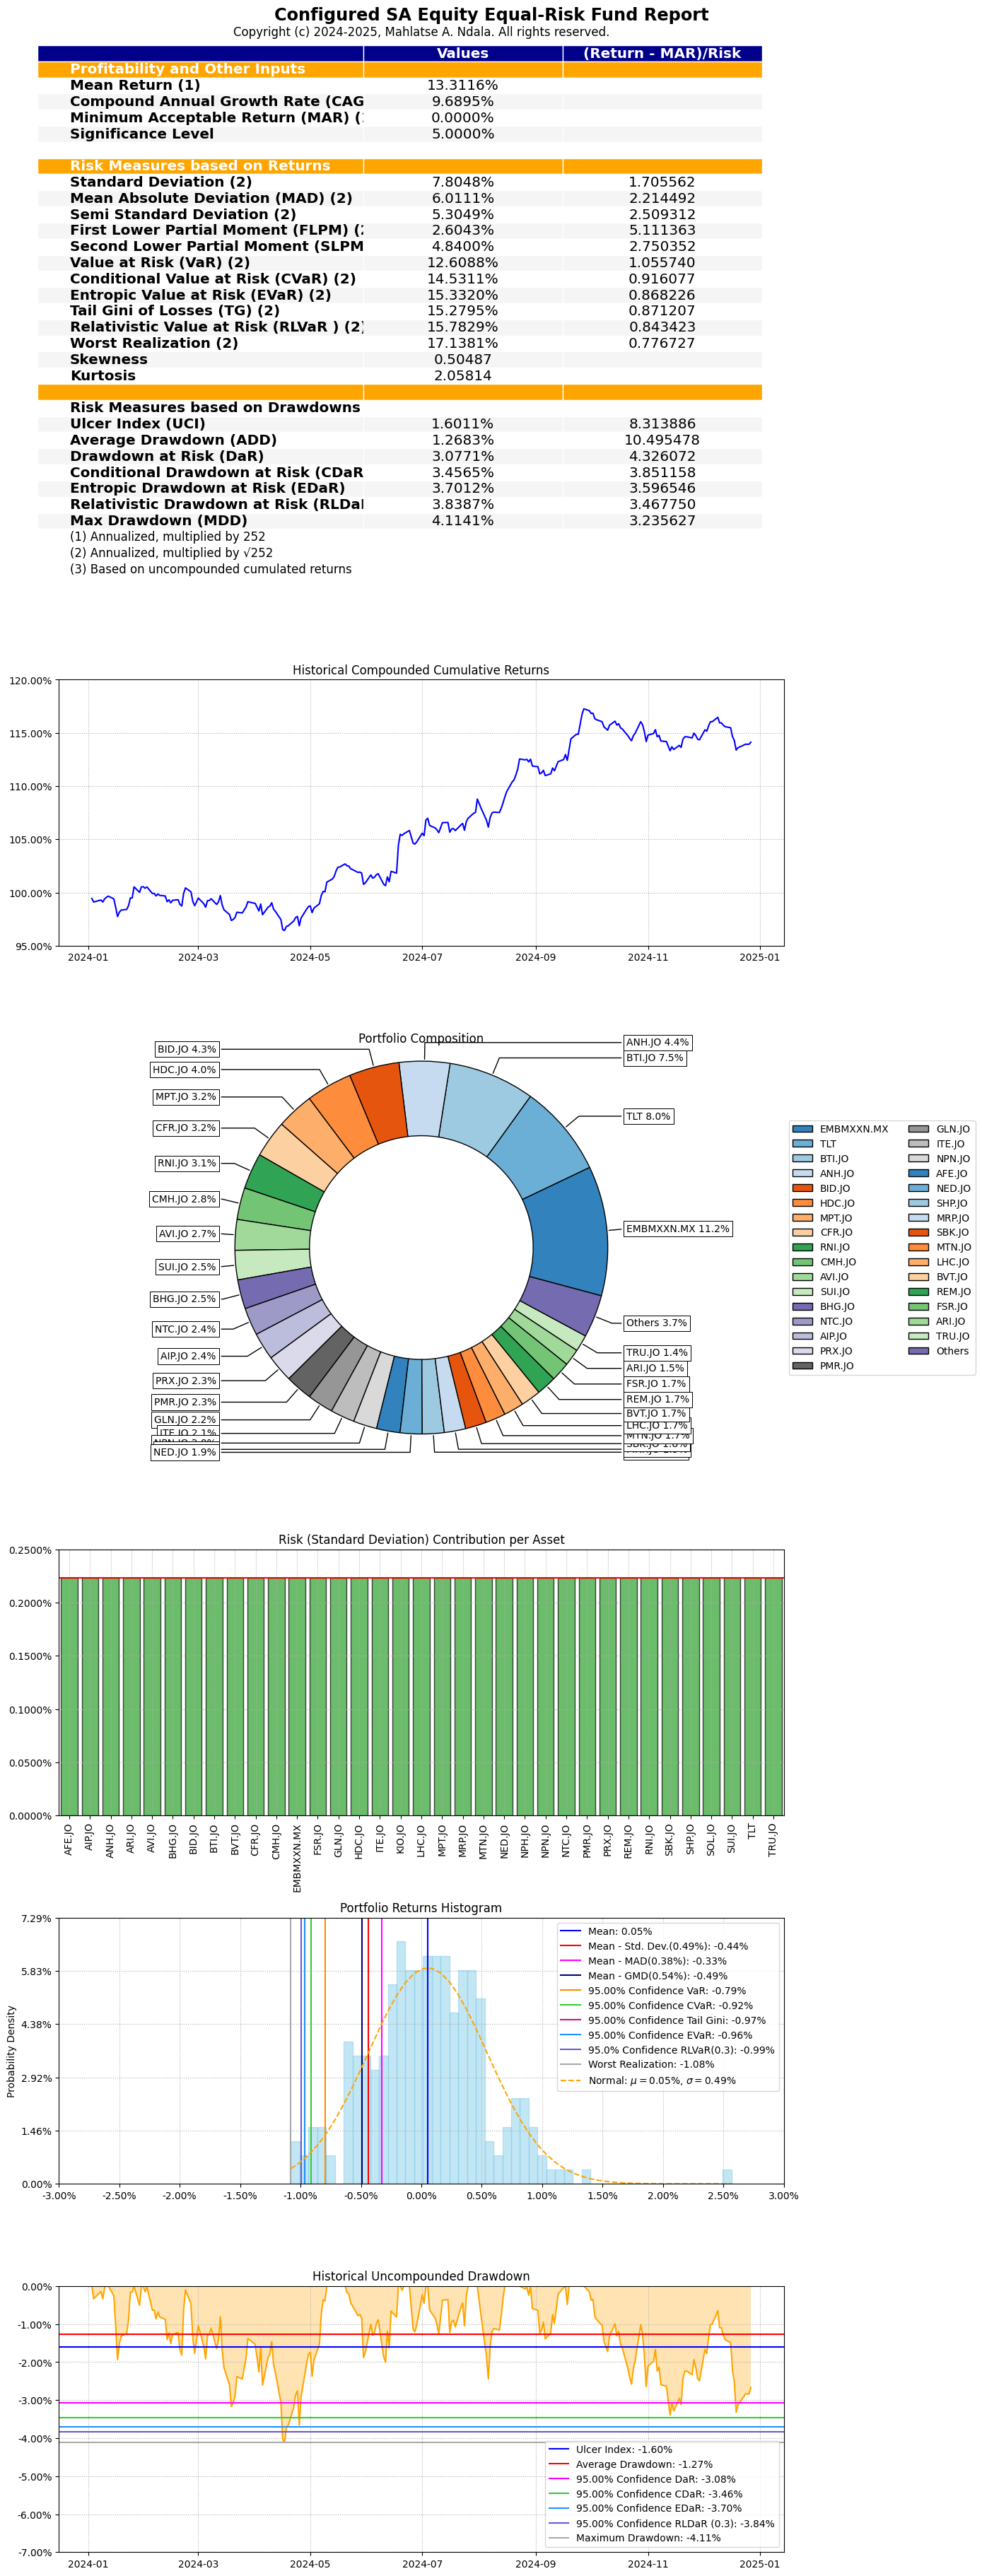

In [8]:
ax = rp.jupyter_report(w=w_rp, returns=Y, rm=rm, rf=0, alpha=0.05, others=0.05)

Calculating the risk parity portfolio for variance.

In [10]:
# Setting the return constraint
port.lowerret = 0.00056488 * 1.5

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)

,AFE.JO,AIP.JO,ANH.JO,ARI.JO,AVI.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,...,PMR.JO,PRX.JO,REM.JO,RNI.JO,SBK.JO,SHP.JO,SOL.JO,SUI.JO,TLT,TRU.JO
weights,1.3728%,4.2317%,3.5400%,0.5548%,3.7966%,0.6071%,1.3193%,13.4160%,0.9477%,5.0639%,...,5.4678%,3.3922%,2.9456%,4.0321%,0.9935%,0.7259%,0.7704%,4.2551%,3.4711%,0.7553%


Portfolio Composition

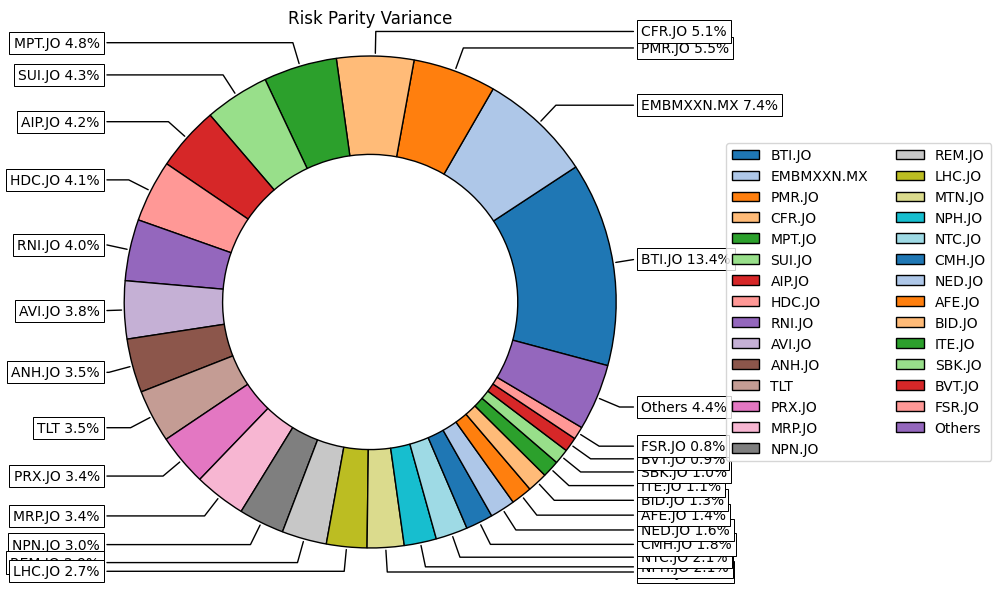

In [11]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

Risk Composition

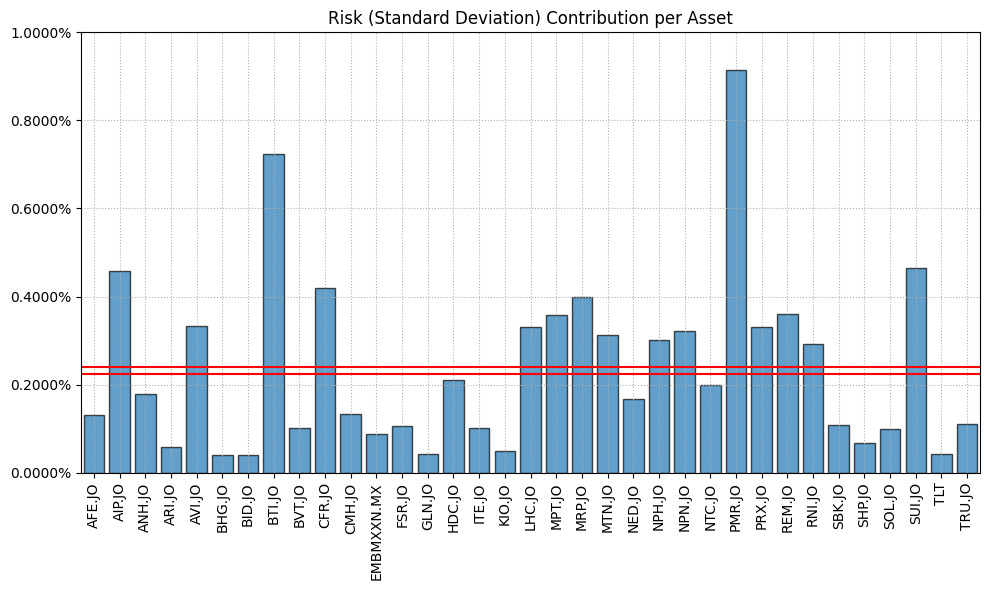

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=ax)

# Plotting equal risk contribution line
ax.axhline(y=a1/len(assets) * 252**0.5, color='r', linestyle='-')

plt.show()

Building the Linear Constraints

In [15]:
asset_classes = pd.read_csv('assets_sample34 - final.csv')

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

constraints = pd.read_csv('views-sample34 - final.csv')

constraints = pd.DataFrame(constraints)

display(constraints)

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Classes,Industry,Banks,<=,10.0000%,NaN,NaN,NaN,NaN
1,False,Classes,Industry,Beverages,<=,7.0000%,NaN,NaN,NaN,NaN
2,False,Classes,Industry,Chemicals,<=,10.0000%,NaN,NaN,NaN,NaN
3,False,Classes,Industry,Food Producers,<=,2.0000%,NaN,NaN,NaN,NaN
4,False,Classes,Industry,Financial Services,<=,2.0000%,NaN,NaN,NaN,NaN
5,False,Classes,Industry,General Industrials,<=,2.0000%,NaN,NaN,NaN,NaN
6,False,Classes,Industry,Electronic and Electrical Equipment,<=,2.0000%,NaN,NaN,NaN,NaN
7,False,Classes,Industry,Investment Banking and Brokerage Services,<=,2.0000%,NaN,NaN,NaN,NaN
8,False,Classes,Industry,Health Care Providers,<=,2.0000%,NaN,NaN,NaN,NaN
9,False,Classes,Industry,Industrial Metals and Mining,<=,2.0000%,NaN,NaN,NaN,NaN


Calculating the risk parity portfolio with linear constraints

In [16]:
A, B = rp.assets_constraints(constraints, asset_classes)

port.ainequality = A
port.binequality = B

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

# display(w_rp.T)

The problem doesn't have a solution with actual input parameters


Portfolio Compositin

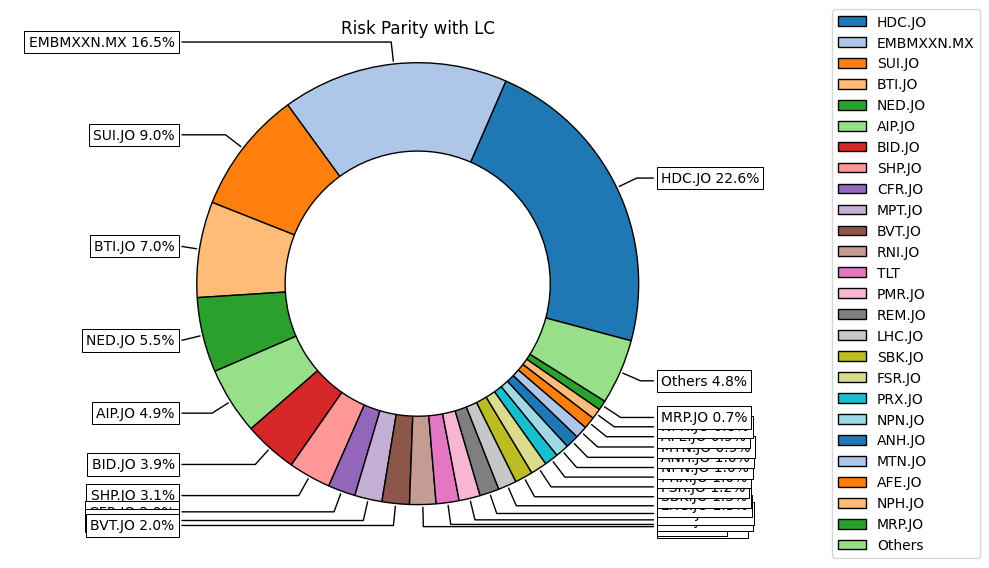

In [29]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity with LC', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [30]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w_rp], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()

display(w_classes)

,weights
Industry,
Emerging Market Bonds,16.5419%
Banks,8.0000%
Beverages,0.9756%
Chemicals,1.2328%
Electronic and Electrical Equipment,1.9235%
Financial Services,2.0000%
Food Producers,2.0000%
General Industrials,2.0000%
Health Care Providers,2.0000%


Plotting the risk contribution graph

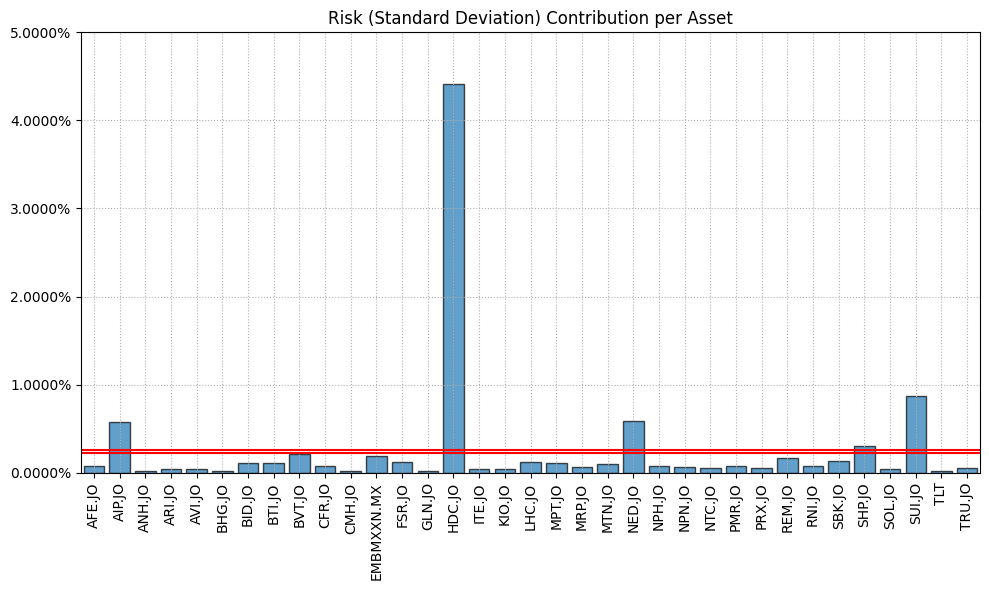

In [31]:
fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=ax)

# Plotting equal risk contribution line
ax.axhline(y=a1/len(assets) * 252**0.5, color='r', linestyle='-')

plt.show()

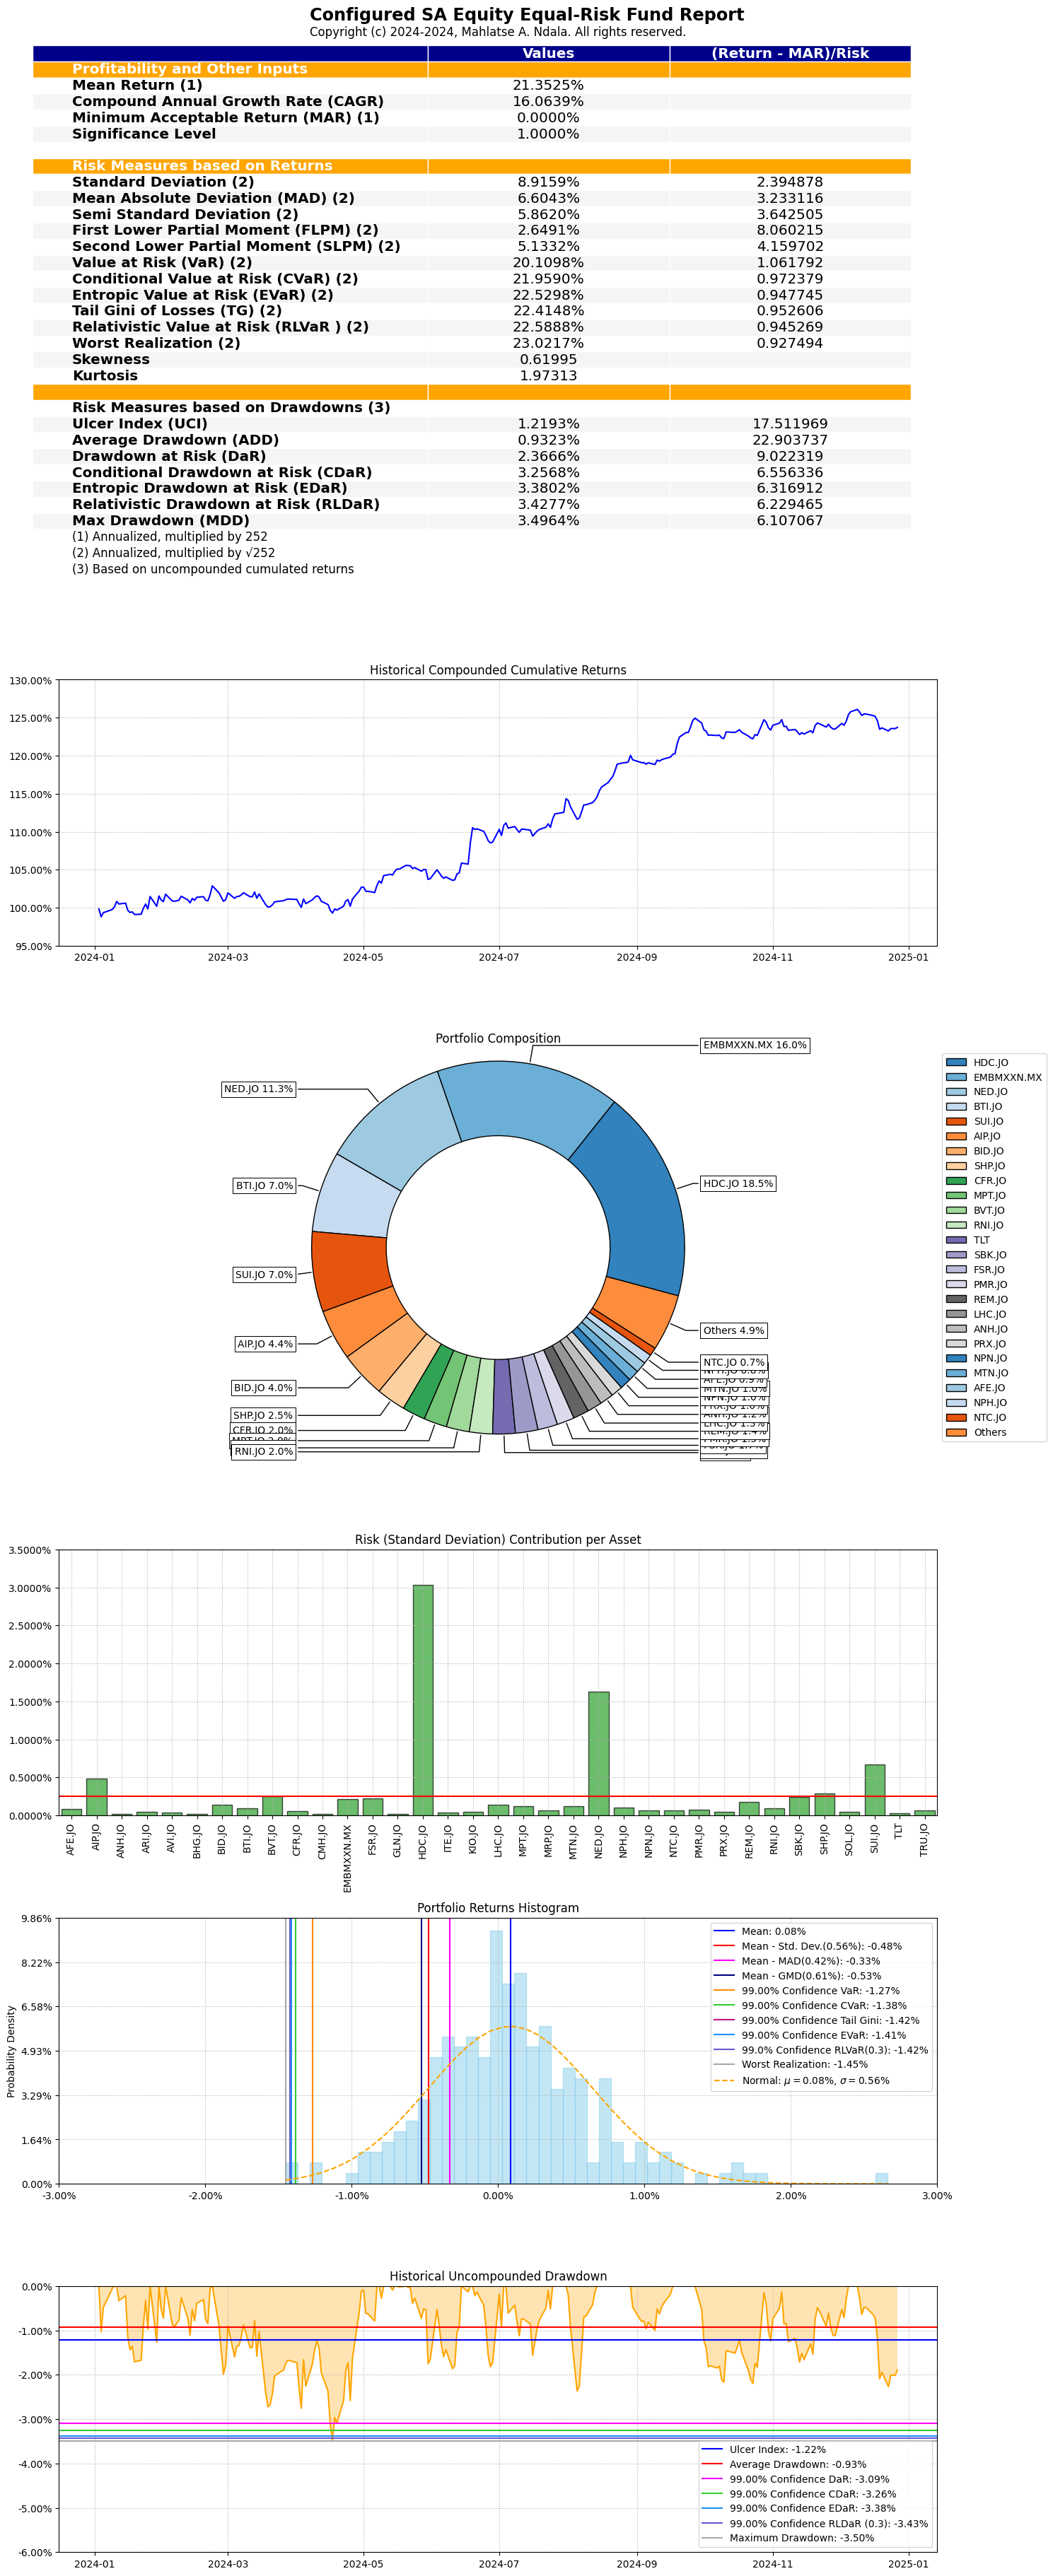

In [34]:
ax = rp.jupyter_report(w=w_rp, returns=Y ,rm=rm, rf=0, alpha=0.01, others=0.05, height=6, width=15)